In [17]:
# Dependencies
import numpy as np
import pandas as pd

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

# Matplotlib
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [4]:
# Using Inspector to print column names to ensure proper column name is used in the challenge

from sqlalchemy import inspect

inspector = inspect(engine)
inspector.get_table_names()

columns = inspector.get_columns('Measurement')
for column in columns:
    print(column)

{'name': 'id', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': 'auto', 'primary_key': 1}
{'name': 'station', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'date', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'prcp', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'tobs', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}


In [5]:
# Import the sqlalchemy extract function.
from sqlalchemy import extract

# 1. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 

month_june = []
month_june = session.query(Measurement.date, Measurement.tobs).\
    filter(func.extract('month', Measurement.date) == 6)


In [6]:
# MOVE TO TOP
# Using Inspector to print column names to ensure proper column name is used in the challenge

from sqlalchemy import inspect

inspector = inspect(engine)
inspector.get_table_names()

columns = inspector.get_columns('Measurement')
for column in columns:
    print(column)

{'name': 'id', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': 'auto', 'primary_key': 1}
{'name': 'station', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'date', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'prcp', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'tobs', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}


In [7]:
# 2. Convert the June temperatures to a list.
print(month_june.all())

[('2010-06-01', 78.0), ('2010-06-02', 76.0), ('2010-06-03', 78.0), ('2010-06-04', 76.0), ('2010-06-05', 77.0), ('2010-06-06', 78.0), ('2010-06-07', 77.0), ('2010-06-08', 78.0), ('2010-06-09', 78.0), ('2010-06-10', 79.0), ('2010-06-11', 78.0), ('2010-06-12', 78.0), ('2010-06-13', 78.0), ('2010-06-14', 77.0), ('2010-06-15', 78.0), ('2010-06-16', 78.0), ('2010-06-17', 77.0), ('2010-06-18', 77.0), ('2010-06-19', 82.0), ('2010-06-20', 78.0), ('2010-06-21', 78.0), ('2010-06-22', 78.0), ('2010-06-23', 78.0), ('2010-06-24', 78.0), ('2010-06-25', 77.0), ('2010-06-26', 76.0), ('2010-06-27', 78.0), ('2010-06-28', 78.0), ('2010-06-29', 78.0), ('2010-06-30', 78.0), ('2011-06-01', 77.0), ('2011-06-02', 78.0), ('2011-06-03', 73.0), ('2011-06-04', 70.0), ('2011-06-05', 76.0), ('2011-06-06', 77.0), ('2011-06-07', 77.0), ('2011-06-08', 77.0), ('2011-06-09', 77.0), ('2011-06-10', 78.0), ('2011-06-11', 77.0), ('2011-06-12', 77.0), ('2011-06-13', 78.0), ('2011-06-14', 78.0), ('2011-06-15', 77.0), ('2011-06

In [8]:
# 3. Create a DataFrame from the list of temperatures for the month of June. 
june_df = pd.DataFrame(month_june, columns=['date', 'temperatures'])

june_df.sample(10)

,date,temperatures
918,2012-06-16,78.0
42,2011-06-13,78.0
460,2017-06-19,77.0
170,2015-06-25,79.0
877,2011-06-05,72.0
14,2010-06-15,78.0
207,2017-06-02,79.0
735,2013-06-27,72.0
1543,2012-06-15,72.0
226,2017-06-21,79.0


In [9]:
# 4. Calculate and print out the summary statistics for the June temperature DataFrame.

june_df.describe().rename(columns = {"temperatures":"June Temps"})

,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


In [10]:
# 5. Return to your challenge instructions to compare your summary statistics

# My June Temperatures are in-line with the Module 9-Challenge, Deliverable 1 June summary statistics.

## D2: Determine the Summary Statistics for December

In [11]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
month_dec = []

month_dec = session.query(Measurement.date, Measurement.tobs).\
    filter(func.extract('month', Measurement.date) == 12)

In [12]:
# 7. Convert the December temperatures to a list.
print(month_dec.all())

[('2010-12-01', 76.0), ('2010-12-03', 74.0), ('2010-12-04', 74.0), ('2010-12-06', 64.0), ('2010-12-07', 64.0), ('2010-12-08', 67.0), ('2010-12-09', 77.0), ('2010-12-10', 66.0), ('2010-12-11', 69.0), ('2010-12-12', 68.0), ('2010-12-13', 68.0), ('2010-12-14', 71.0), ('2010-12-15', 74.0), ('2010-12-16', 67.0), ('2010-12-17', 66.0), ('2010-12-18', 69.0), ('2010-12-19', 71.0), ('2010-12-23', 70.0), ('2010-12-24', 70.0), ('2010-12-26', 74.0), ('2010-12-27', 74.0), ('2010-12-28', 71.0), ('2010-12-29', 75.0), ('2010-12-30', 75.0), ('2010-12-31', 72.0), ('2011-12-01', 69.0), ('2011-12-02', 68.0), ('2011-12-03', 73.0), ('2011-12-04', 74.0), ('2011-12-05', 73.0), ('2011-12-06', 73.0), ('2011-12-07', 73.0), ('2011-12-08', 73.0), ('2011-12-09', 71.0), ('2011-12-10', 73.0), ('2011-12-11', 73.0), ('2011-12-12', 77.0), ('2011-12-13', 72.0), ('2011-12-14', 71.0), ('2011-12-15', 73.0), ('2011-12-16', 70.0), ('2011-12-17', 73.0), ('2011-12-18', 69.0), ('2011-12-19', 74.0), ('2011-12-20', 72.0), ('2011-12

In [13]:
#8. Create a DataFrame from the list of temperatures for the month of December.
dec_df = pd.DataFrame(month_dec, columns=['date', 'temperature'])

dec_df.sample(10)

,date,temperature
349,2014-12-16,71.0
584,2016-12-10,76.0
221,2010-12-12,71.0
1338,2010-12-28,70.0
219,2010-12-10,65.0
422,2016-12-28,71.0
1257,2013-12-07,70.0
977,2011-12-05,71.0
800,2012-12-07,72.0
1024,2012-12-21,70.0


In [14]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.

dec_df.describe().rename(columns={'temperature':'December Temps'})

,December Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


In [15]:
# 10. Return to your challenge instructions to compare your summary statistics

# My December Temperatures are in-line with the Module 9-Challenge, Deliverable 2 December summary statistics.

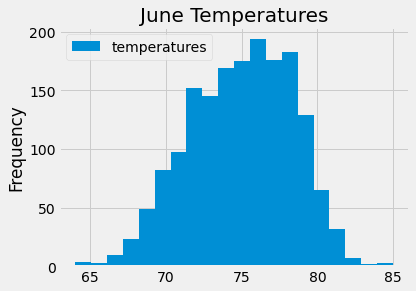

In [30]:
# Plot June results for summary stats visualization

june_fig = june_df.plot.hist(bins=20)
plt.tight_layout()
june_fig.set_title("June Temperatures", fontsize=20)
plt.savefig("Resources/June Graph.png")

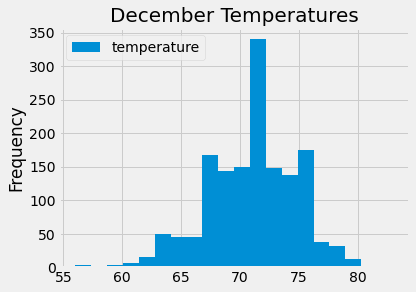

In [31]:
# Plot December results for summary stats visualization
dec_fig = dec_df.plot.hist(bins=20)
plt.tight_layout()
dec_fig.set_title("December Temperatures", fontsize=20)
plt.savefig("Resources/December Graph.png")